In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [2]:
N_ep = 200 # Number of episodes

In [21]:
# Load data
f = open('replay_memory_0','rb')
dataset = pickle.load(f)

# Data size
num_data = len(dataset)
# Features
X = torch.cat([x[0] for x in dataset]).float()
# Labels
y = torch.from_numpy(np.array([x[1] for x in dataset])).float()

#X.size()
y

tensor([ 4.1135e-02,  1.1481e-01,  3.2495e-01,  ...,  3.4257e-02,
        -1.8565e-02,  2.6096e-02])

In [4]:
# Network
class net(nn.Module):
    def __init__(self, input_dim=3, output_dim=1, hidden_size=100, hidden_dropout_prob=0):
        super(net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_size) # input layer -> hidden layer
        self.fc2 = nn.Linear(hidden_size, output_dim) # hidden layer -> output layer
        
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = net()

In [5]:
#print(model.fc1.weight)
#print(model.fc2.weight)
sample_num=101

In [6]:
print(model(X[sample_num]))
print(y[sample_num])
print(model(X[sample_num])-y[sample_num])

tensor(1.00000e-03 *
       [-8.9857])
tensor(1.00000e-02 *
       -1.1957)
tensor(1.00000e-03 *
       [ 2.9715])


In [7]:

optimizer = optim.Adam(model.parameters())

training_loss = []
# Training
for i_ep in range(N_ep):
    for i_data in range(num_data):
        features = X[i_data]
        y_data = y[i_data]
        #features = X
        #y_data = y.view(-1,1)
        
        y_pred = model(features)
        
        #loss = F.smooth_l1_loss(y_pred,y_data)
        loss = torch.mean((y_pred - y_data)**2)
        training_loss.append(loss)
        
        # Optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

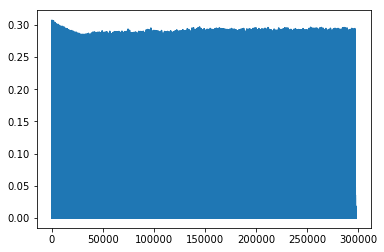

In [8]:
plt.plot(training_loss)
plt.savefig('train_loss_curve.png')
plt.show()

In [9]:
print(model.fc1.weight)
print(model.fc2.weight)

Parameter containing:
tensor([[ 0.0328,  0.0886,  0.0228],
        [-0.0410,  0.0574, -0.0042],
        [ 0.0112, -0.0449,  0.0918],
        [ 0.0922, -0.1676,  0.1413],
        [-0.6808,  0.3571, -0.3721],
        [ 0.0214,  0.0909, -0.1334],
        [-0.0141,  0.0886, -0.1021],
        [ 0.0209, -0.0211,  0.0548],
        [ 0.3883, -0.3948, -0.1853],
        [ 0.0978, -0.0598,  0.1947],
        [ 0.0494, -0.0583,  0.0044],
        [ 0.0798, -0.1024,  0.1769],
        [ 0.3951, -0.1238, -0.2104],
        [-0.0148,  0.0338, -0.0662],
        [ 0.0576, -0.0495,  0.1189],
        [-0.0023,  0.2045,  0.4329],
        [-1.0741, -0.6556, -0.9672],
        [ 0.0429, -0.0715,  0.0641],
        [-0.8653, -0.4384, -0.8813],
        [ 0.0416, -0.0488, -0.0186],
        [-0.4120,  0.3216, -0.2611],
        [ 0.0497, -0.0401,  0.3258],
        [ 0.0587, -0.0887,  0.1932],
        [-1.0279, -0.0713, -0.3166],
        [-0.6728, -0.1608,  0.0801],
        [ 1.1018, -0.2401, -0.2395],
        [-0.0650

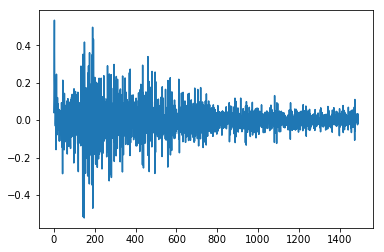

In [10]:
plt.plot(y)
plt.show()

In [11]:
print(model(X[sample_num]))
print(y[sample_num])
print(model(X[sample_num])-y[sample_num])

tensor(1.00000e-02 *
       [-2.4774])
tensor(1.00000e-02 *
       -1.1957)
tensor(1.00000e-02 *
       [-1.2817])


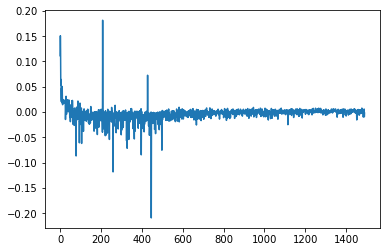

In [12]:
plt.plot(model(X).detach().numpy())
plt.show()

In [13]:
model(X)

tensor([[ 1.1113e-01],
        [ 1.5049e-01],
        [ 1.2310e-01],
        ...,
        [ 5.7338e-03],
        [-9.6909e-03],
        [-2.2604e-03]])